In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle
%matplotlib inline

In [2]:
#calling in dataframe:
df=wrangle.creating_pumpkin_patch()

In [3]:
#cleaning up:
df = wrangle.main_clean(df)
df

,Date,Region,Class,Commodity,Variety,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,Last Year\n Stores,Last Year\n Weighted Avg Price
0,2018-08-03,NATIONAL,VEGETABLES,PUMPKINS,UNKNOWN,per pound,46,0.49,0.00,0.00,nan,0.00
1,2018-08-03,SOUTHEAST U.S.,VEGETABLES,PUMPKINS,UNKNOWN,per pound,46,0.49,0.49,0.49,nan,0.00
2,2018-08-31,NATIONAL,VEGETABLES,PUMPKINS,UNKNOWN,each,15,5.00,0.00,0.00,15,4.99
3,2018-08-31,NATIONAL,VEGETABLES,PUMPKINS,PIE TYPE,per pound,36,0.69,0.00,0.00,nan,0.00
4,2018-08-31,MIDWEST U.S.,VEGETABLES,PUMPKINS,UNKNOWN,each,15,5.00,5.00,5.00,15,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...
560,2021-12-03,SOUTHWEST U.S.,VEGETABLES,PUMPKINS,PIE TYPE,per pound,113,1.49,1.49,1.49,nan,0.00
562,2021-12-24,NORTHEAST U.S.,VEGETABLES,PUMPKINS,PIE TYPE,per pound,175,0.99,0.99,0.99,nan,0.00
561,2021-12-24,NATIONAL,VEGETABLES,PUMPKINS,PIE TYPE,per pound,175,0.99,0.00,0.00,nan,0.00
563,2022-01-07,NATIONAL,VEGETABLES,PUMPKINS,PIE TYPE,per pound,175,1.29,0.00,0.00,nan,0.00


In [4]:
df["Last Year\n Stores"].value_counts()

nan     334
6        19
15       15
11       15
220      15
       ... 
353       1
1192      1
405       1
150       1
191       1
Name: Last Year\n Stores, Length: 439, dtype: int64

In [5]:
#I've decided to just drop the last year number of stores:
df = df.drop(columns=["Last Year\n Stores"])


In [6]:
#looking at the dataframe:
df.head()

,Date,Region,Class,Commodity,Variety,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,Last Year\n Weighted Avg Price
0,2018-08-03,NATIONAL,VEGETABLES,PUMPKINS,UNKNOWN,per pound,46,0.49,0.00,0.00,0.00
1,2018-08-03,SOUTHEAST U.S.,VEGETABLES,PUMPKINS,UNKNOWN,per pound,46,0.49,0.49,0.49,0.00
2,2018-08-31,NATIONAL,VEGETABLES,PUMPKINS,UNKNOWN,each,15,5.00,0.00,0.00,4.99
3,2018-08-31,NATIONAL,VEGETABLES,PUMPKINS,PIE TYPE,per pound,36,0.69,0.00,0.00,0.00
4,2018-08-31,MIDWEST U.S.,VEGETABLES,PUMPKINS,UNKNOWN,each,15,5.00,5.00,5.00,4.99


## Statistics of dataset:

In [20]:
#looking at the overview of statistics of dataset:
print(df.describe(include="object"))
print("*"*60)
print(df.describe())
print("*"*60)
print(df.info())

          Region       Class Commodity   Variety       Unit
count       1166        1166      1166      1166       1166
unique         9           1         1         3          2
top     NATIONAL  VEGETABLES  PUMPKINS  PIE TYPE  per pound
freq         282        1166      1166       555        585
************************************************************
       Number of Stores  Weighted Avg Price    Low Price   High Price  \
count       1166.000000         1166.000000  1166.000000  1166.000000   
mean         306.962264            1.951089     1.333019     1.779014   
std          634.703509            1.678385     1.572308     2.096156   
min            1.000000            0.200000     0.000000     0.000000   
25%           21.000000            0.810000     0.190000     0.290000   
50%           97.000000            1.290000     0.880000     0.990000   
75%          295.500000            2.500000     1.990000     2.500000   
max         7925.000000           11.990000    11.99000

In [ ]:
### Observations:
- There are 1166 rows with 11 columns
- The minimum average price of pumpkins is $0.20 and maximum is $11.99

## Univariate Exploration:
- Taking a look at the shape of the data.

In [7]:
def univariate(df):
    '''
    This function creates univariate histograms of all pumpkin variables that are numeric.

    '''
    df.hist(bins = 30, figsize = (20, 20), color= 'orange')

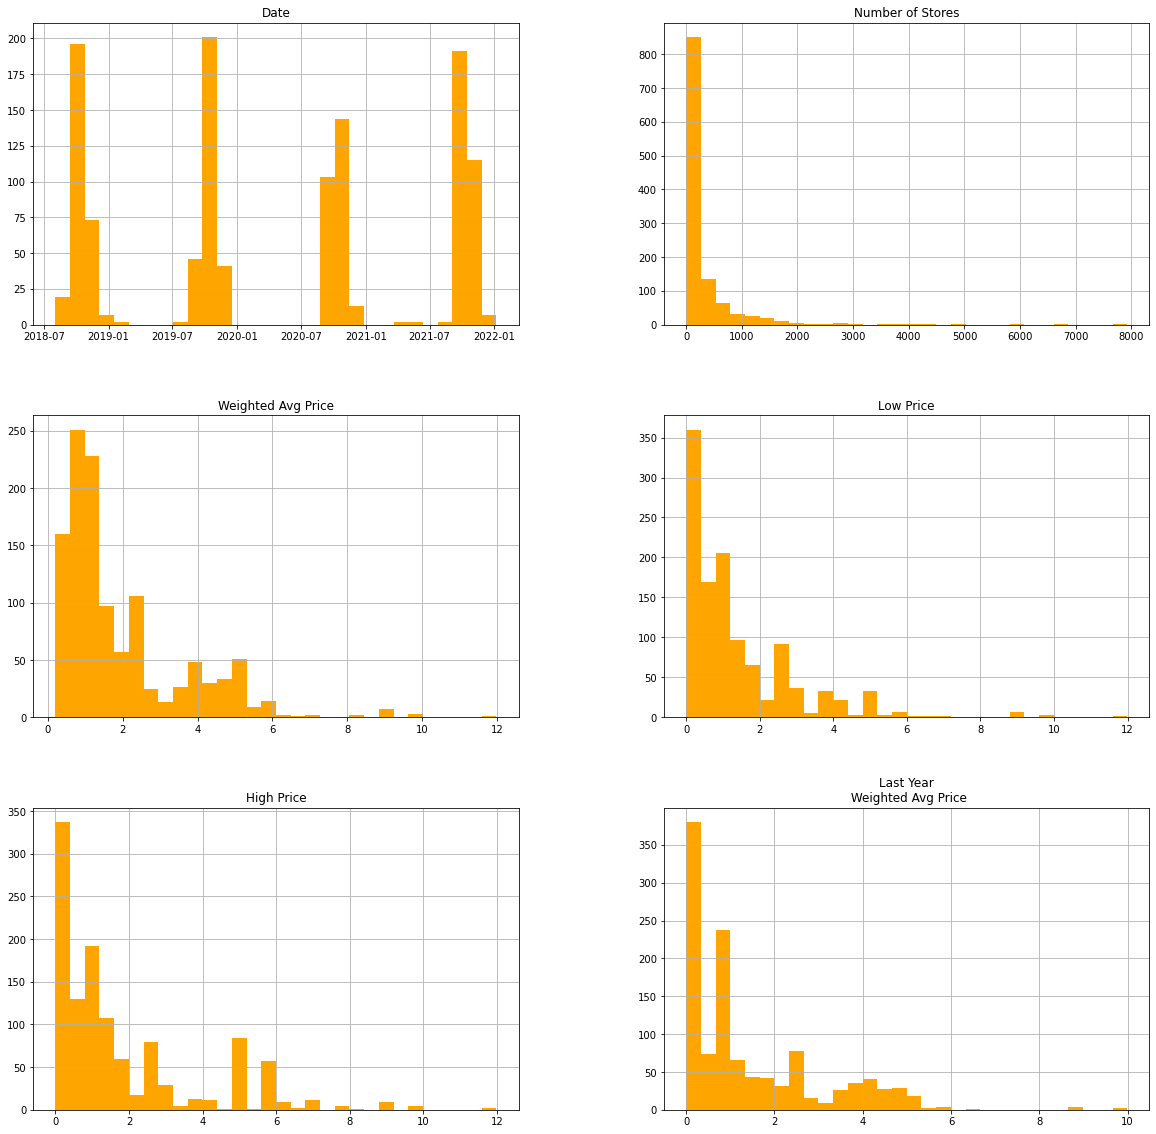

In [8]:
univariate(df)

### Take aways:
Most of the variables (beyond date) are right-skewed.

______________________

## Set Index and look at Time series of data:
Because of the seasonality of pumpkins (growth times and when pumpkin-flavored things seeme to come out, I know that in any sort of prediction method (such as analyzing each states pumpkin growth and sales to predict future results) this will be more of a time-series project. <br><br>
Let's see now what that looks like by setting the index as date.

In [9]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2018-08-03', '2018-08-03', '2018-08-31', '2018-08-31',
               '2018-08-31', '2018-08-31', '2018-09-07', '2018-09-07',
               '2018-09-07', '2018-09-07',
               ...
               '2021-11-26', '2021-11-26', '2021-11-26', '2021-12-03',
               '2021-12-03', '2021-12-03', '2021-12-24', '2021-12-24',
               '2022-01-07', '2022-01-07'],
              dtype='datetime64[ns]', name='Date', length=1166, freq=None)

In [10]:
#seeing the time series of how many stores pumpkins sold to during which months/years
y = df["Number of Stores"]

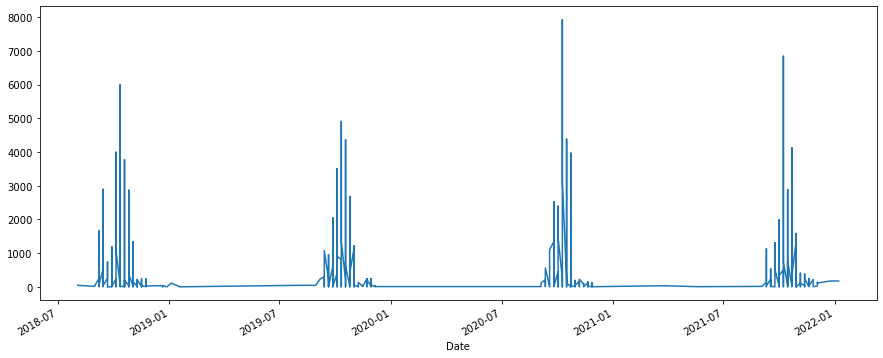

In [11]:
y.plot(figsize=(15, 6))
plt.show()

In [12]:
#looking at just 2020 stores that sold pumpkins using count:
y['2020']

Date
2020-09-04      9
2020-09-04    123
2020-09-04      9
2020-09-04    123
2020-09-11    206
             ... 
2020-11-27      7
2020-11-27    123
2020-11-27      7
2020-12-04      7
2020-12-04      7
Name: Number of Stores, Length: 260, dtype: int64

In [13]:
#looking at weighted avg price over time:
y = df["Weighted Avg Price"]

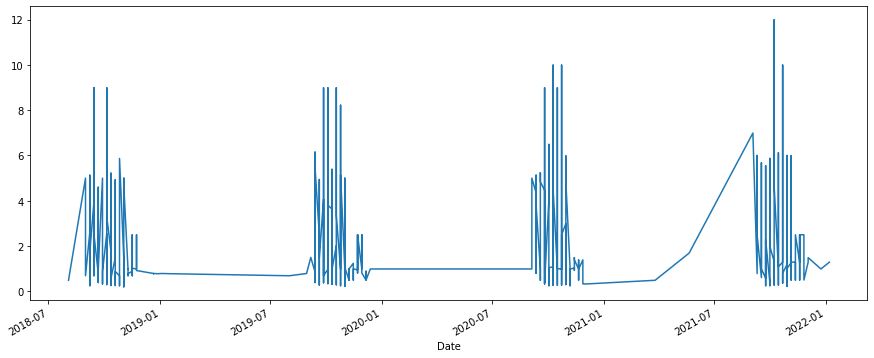

In [14]:
y.plot(figsize=(15, 6))
plt.show()

### Takeaways:
-It is interesting to note the sloping difference of price and pumpkin availability during months in 2021 that wouldn't otherwise be in previous years.

In [15]:
#looking at just 2021 pricing:
y['2021':]

Date
2021-03-26    0.49
2021-03-26    0.49
2021-05-21    1.69
2021-05-21    1.69
2021-09-03    6.99
              ... 
2021-12-03    1.49
2021-12-24    0.99
2021-12-24    0.99
2022-01-07    1.29
2022-01-07    1.29
Name: Weighted Avg Price, Length: 319, dtype: float64

In [16]:
#I'm wondering what that spike date was....
y['2021':].max()

11.99

In [17]:
df[df['Weighted Avg Price'] == 11.99]

,Region,Class,Commodity,Variety,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,Last Year\n Weighted Avg Price
Date,,,,,,,,,,
2021-10-08,HAWAII,VEGETABLES,PUMPKINS,UNKNOWN,each,6,11.99,11.99,11.99,9.99


### Takeaways:

- This is showing me that I will need to further bin pricing based on types of units (each vs per pound), since
this would skew the data when looking as a whole rather than within the same pricing group.